In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(12,6)

In [3]:
print("="*80)
print("PHASE 1: Loading and Exploring Data with Pandas & NumPy")
print("="*80)

PHASE 1: Loading and Exploring Data with Pandas & NumPy


In [4]:
df=pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (50000, 2)
Columns: ['review', 'sentiment']

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
print("\n" + "="*80)
print("Basic Statistics:")
print("="*80)
print(f"Total Reviews: {len(df)}")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Basic Statistics:
Total Reviews: 50000
Missing Values:
review       0
sentiment    0
dtype: int64

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"\nAfter cleaning: {df.shape[0]} reviews")


After cleaning: 49582 reviews


In [8]:
print("\n" + "="*80)
print("PHASE 2: NLP Preprocessing (Tokenization, Stopwords, Stemming, Lemmatization)")
print("="*80)


PHASE 2: NLP Preprocessing (Tokenization, Stopwords, Stemming, Lemmatization)


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [10]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [13]:
def preprocess_text(text):
    """Complete text preprocessing pipeline"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens 
              if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

    print("Preprocessing reviews...")
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [14]:
print("\nExample of preprocessing:")
print(f"Original: {df['review'].iloc[0][:250]}...")
print(f"Cleaned: {df['cleaned_review'].iloc[0][:250]}...")


Example of preprocessing:
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of ...
Cleaned: one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word...


In [15]:
print("\n" + "="*80)
print("PHASE 3: Feature Engineering")
print("="*80)


PHASE 3: Feature Engineering


In [16]:
df['review_length'] = df['review'].apply(len)
df['word_count']= df['cleaned_review'].apply(lambda x: len(x.split()))
df['sentiment_numeric']=df['sentiment'].map({'positive':1,'negative':0})


In [17]:
print("Feature statistics:")
print(df[['review_length','word_count','sentiment_numeric']].describe())

Feature statistics:
       review_length    word_count  sentiment_numeric
count   49582.000000  49582.000000       49582.000000
mean     1310.568230    117.214856           0.501876
std       990.762238     88.357177           0.500002
min        32.000000      3.000000           0.000000
25%       699.000000     63.000000           0.000000
50%       971.000000     87.000000           1.000000
75%      1592.000000    143.000000           1.000000
max     13704.000000   1387.000000           1.000000


In [18]:
print("\n" + "="*80)
print("PHASE 4: Feature Extraction - Bag of Words & TF-IDF Vectorization")
print("="*80)


PHASE 4: Feature Extraction - Bag of Words & TF-IDF Vectorization


In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [20]:
X = df['cleaned_review']
y = df['sentiment_numeric']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [22]:
print(f"Training set: {len(X_train)} reviews")
print(f"Test set: {len(X_test)} reviews")

Training set: 39665 reviews
Test set: 9917 reviews


In [23]:
print("\nApplying Bag of words...")
count_vectorizer =CountVectorizer(max_features=5000)
X_train_bow= count_vectorizer.fit_transform(X_train)
X_test_bow=count_vectorizer.transform(X_test)
print(f"Bow feature shape: {X_train_bow.shape}")


Applying Bag of words...
Bow feature shape: (39665, 5000)


In [24]:
#TF_IDF VECTORIZER
print("\nApplying TF-IDF Vectorizer")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(f"tf-idf feature shape:{X_train_tfidf.shape}")


Applying TF-IDF Vectorizer
tf-idf feature shape:(39665, 5000)


In [25]:
print("\n" + "="*80)
print("PHASE 5: Training Machine Learning Models")
print("="*80)


PHASE 5: Training Machine Learning Models


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
results = {}

In [28]:
print("\n1. Naive Bayes (Bag of words):")
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow,y_train)
y_pred_nb_bow=nb_bow.predict(X_test_bow)
nb_bow_accuracy = accuracy_score(y_test,y_pred_nb_bow)
print(f"Accuracy: {nb_bow_accuracy:.4f}")
results['Naive Bayes (BoW)']=nb_bow_accuracy


1. Naive Bayes (Bag of words):
Accuracy: 0.8435


In [29]:
print("\n2. Naive Bayes (TF-IDF):")
nb_tfidf=MultinomialNB()
nb_tfidf.fit(X_train_tfidf,y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_tfidf_accuracy=accuracy_score(y_test, y_pred_nb_tfidf)
print(f"Accuracy: {nb_tfidf_accuracy:.4f}")
results['Naive Bayes (TF-IDF)']=nb_tfidf_accuracy


2. Naive Bayes (TF-IDF):
Accuracy: 0.8520


In [30]:
print("\n3. Logistic Regression (Bag of words):")
lr_bow = LogisticRegression(max_iter=1000,random_state=42)
lr_bow.fit(X_train_bow,y_train)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
lr_bow_accuracy = accuracy_score(y_test,y_pred_lr_bow)
print(f"Accuracy:{lr_bow_accuracy:.4f}")
results['Logistic Regressiob (BoW)']=lr_bow_accuracy


3. Logistic Regression (Bag of words):
Accuracy:0.8666


In [31]:
print("\n3. Logistic Regression (TF-IDF):")
lr_tfidf = LogisticRegression(max_iter=1000,random_state=42)
lr_tfidf.fit(X_train_tfidf,y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)
lr_tfidf_accuracy = accuracy_score(y_test,y_pred_lr_tfidf)
print(f"Accuracy:{lr_tfidf_accuracy:.4f}")
results['Logistic Regressiob (BoW)']=lr_tfidf_accuracy


3. Logistic Regression (TF-IDF):
Accuracy:0.8823


In [32]:
best_model_name = max(results,key=results.get)
print(f"\n{'='*80}")
print(f"Best Model:{best_model_name} with accuracy:{results[best_model_name]:.4f}")


Best Model:Logistic Regressiob (BoW) with accuracy:0.8823


In [33]:
print("\n" + "="*80)
print("PHASE 6: Model Evaluation and Improvement")
print("="*80)



PHASE 6: Model Evaluation and Improvement


In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [35]:
print("\Detailed Classification Report (Best Model):")
print(classification_report(y_test,y_pred_lr_tfidf,target_names=['Negative','Positive']))


\Detailed Classification Report (Best Model):
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4940
    Positive       0.88      0.89      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [36]:
cm = confusion_matrix(y_test,y_pred_lr_tfidf)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[4310  630]
 [ 537 4440]]


In [37]:
print("\nCroos-Validation (5-fold):")
cv_scores = cross_val_score(lr_tfidf,X_train_tfidf,y_train,cv=5)
print(f"CV Scores:{cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}(+/-{cv_scores.std()*2:.4f})")
print(f"Test Set Score: {lr_tfidf_accuracy}")


Croos-Validation (5-fold):
CV Scores:[0.88680197 0.88251607 0.88365057 0.8821379  0.88264213]
Mean CV Score: 0.8835(+/-0.0034)
Test Set Score: 0.8823232832509832


In [38]:
train_score = lr_tfidf.score(X_train_tfidf, y_train)
test_score = lr_tfidf_accuracy
print(f"\nOverfitting Analysis:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Difference: {abs(train_score - test_score):.4f}")


Overfitting Analysis:
Training Accuracy: 0.9084
Test Accuracy: 0.8823
Difference: 0.0260


In [39]:
if abs(train_score - test_score) < 0.05:
    print("Model is well-balanced (no significant overfitting)")
elif train_score > test_score:
    print("Potential overfitting detected")
else:
    print("Potential underfitting detected")

Model is well-balanced (no significant overfitting)


In [40]:
param_grid = {
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        random_state=42
    ),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_tfidf, y_train)


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')

In [41]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 1}
Best CV Score: 0.8821


In [42]:
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Optimized Model Accuracy: {final_accuracy:.4f}")

Final Optimized Model Accuracy: 0.8823


In [43]:
print("\n" + "="*80)
print("PHASE 7: Comprehensive EDA and Visualizations")
print("="*80)


PHASE 7: Comprehensive EDA and Visualizations


In [44]:
!pip install wordcloud



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from wordcloud import WordCloud
from collections import Counter

In [46]:
import sys
print(sys.executable)


C:\Users\Chhav\AppData\Local\Programs\Python\Python313\python.exe


In [47]:
import sys
!{sys.executable} -m pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Chhav\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [48]:
from wordcloud import WordCloud
from collections import Counter

In [49]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

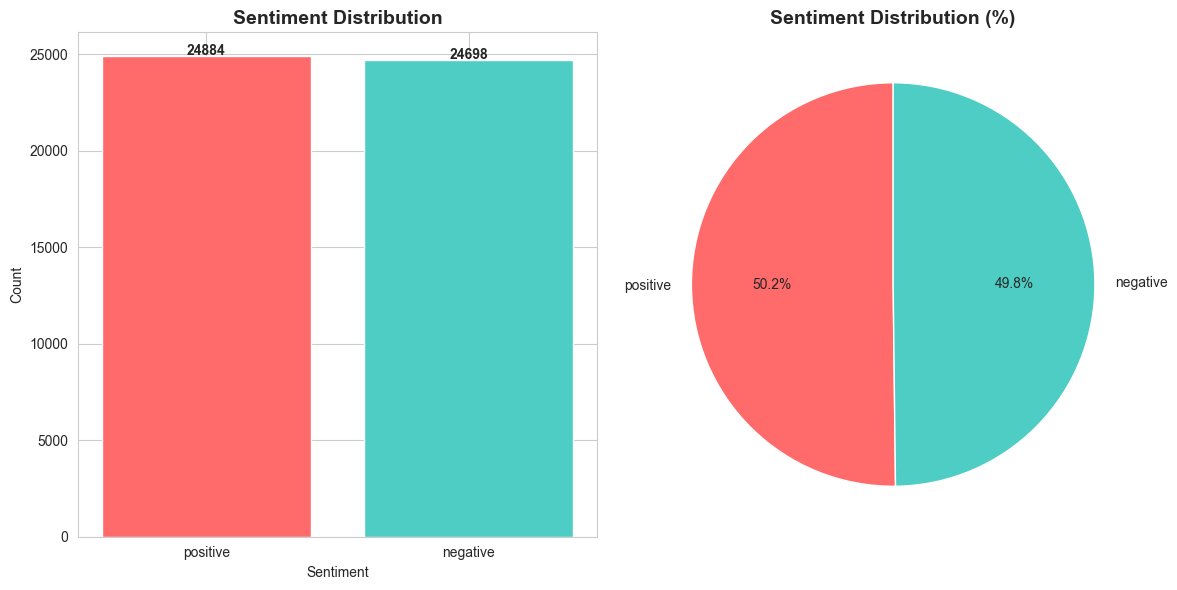

Sentiment distribution visualization created


In [50]:
plt.subplot(1,2,1)
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index,sentiment_counts.values,color=['#ff6b6b','#4ecdc4'])
plt.title('Sentiment Distribution',fontsize=14,fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for i,v in enumerate(sentiment_counts.values):
    plt.text(i,v+50,str(v),ha='center',fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#ff6b6b', '#4ecdc4'], startangle=90)
plt.title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Sentiment distribution visualization created")

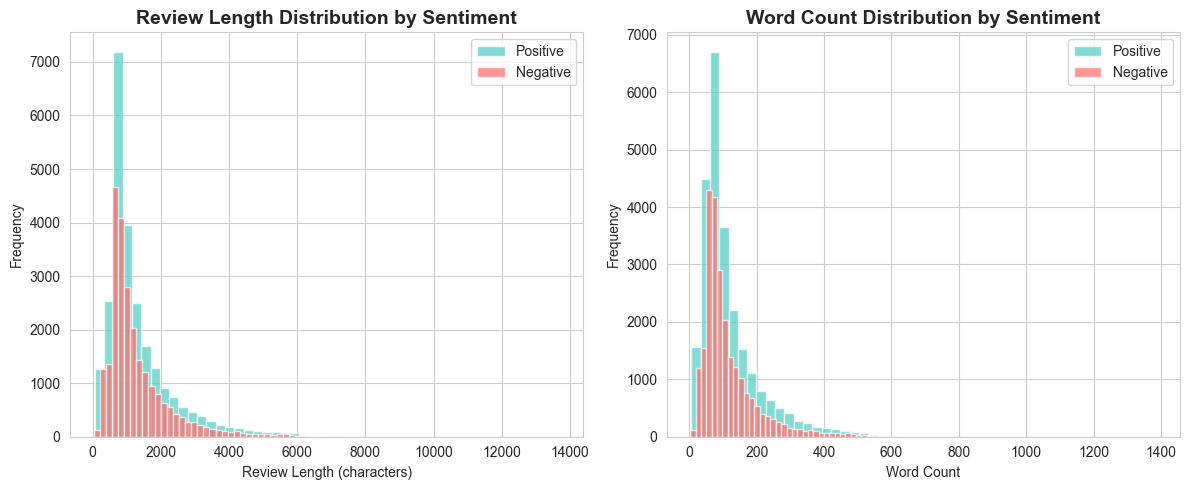

Length distribution visualization created


In [51]:
# 2. Review Length Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['sentiment']=='positive']['review_length'], bins=50, alpha=0.7, 
         label='Positive', color='#4ecdc4')
plt.hist(df[df['sentiment']=='negative']['review_length'], bins=50, alpha=0.7, 
         label='Negative', color='#ff6b6b')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.title('Review Length Distribution by Sentiment', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df[df['sentiment']=='positive']['word_count'], bins=50, alpha=0.7, 
         label='Positive', color='#4ecdc4')
plt.hist(df[df['sentiment']=='negative']['word_count'], bins=50, alpha=0.7, 
         label='Negative', color='#ff6b6b')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.savefig('length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Length distribution visualization created")

In [52]:
# 3. Word Frequency Analysis
print("\nAnalyzing word frequencies...")


Analyzing word frequencies...


In [53]:
positive_words = ' '.join(df[df['sentiment']=='positive']['cleaned_review']).split()
negative_words = ' '.join(df[df['sentiment']=='negative']['cleaned_review']).split()

In [54]:
pos_freq = Counter(positive_words).most_common(15)
neg_freq = Counter(negative_words).most_common(15)

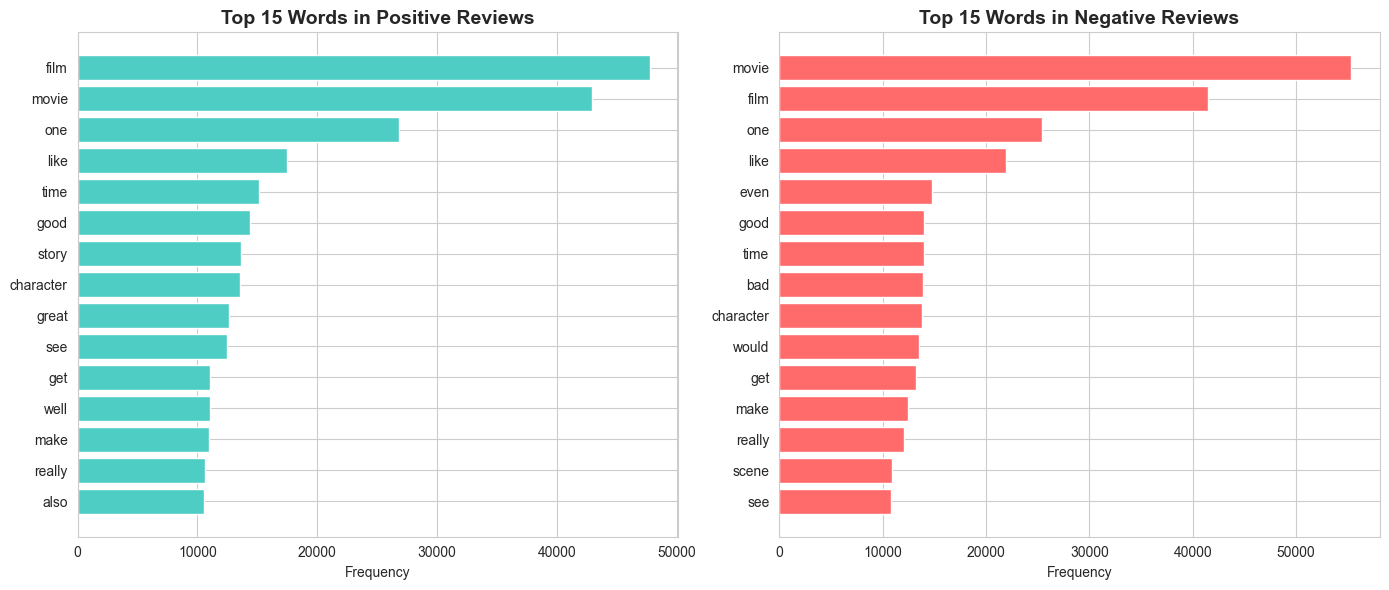

Word frequency visualization created


In [55]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
words, counts = zip(*pos_freq)
plt.barh(range(len(words)), counts, color='#4ecdc4')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 15 Words in Positive Reviews', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
words, counts = zip(*neg_freq)
plt.barh(range(len(words)), counts, color='#ff6b6b')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 15 Words in Negative Reviews', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

print("Word frequency visualization created")


Generating word clouds...


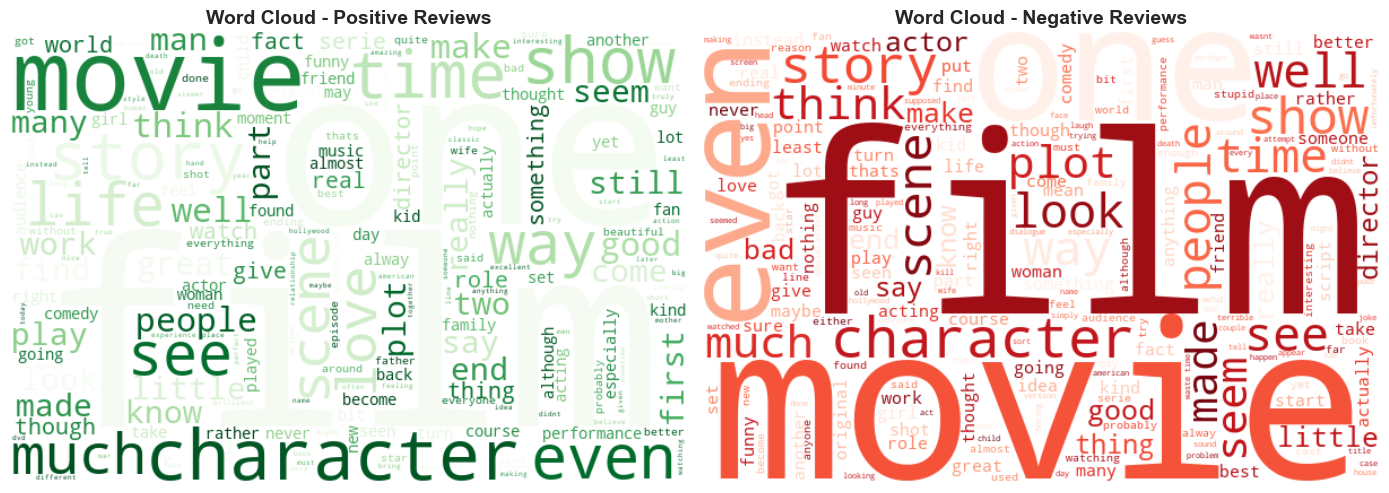

Word cloud visualization created


In [56]:
print("\nGenerating word clouds...")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white',
                          colormap='Greens').generate(' '.join(positive_words))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white',
                          colormap='Reds').generate(' '.join(negative_words))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print("Word cloud visualization created")

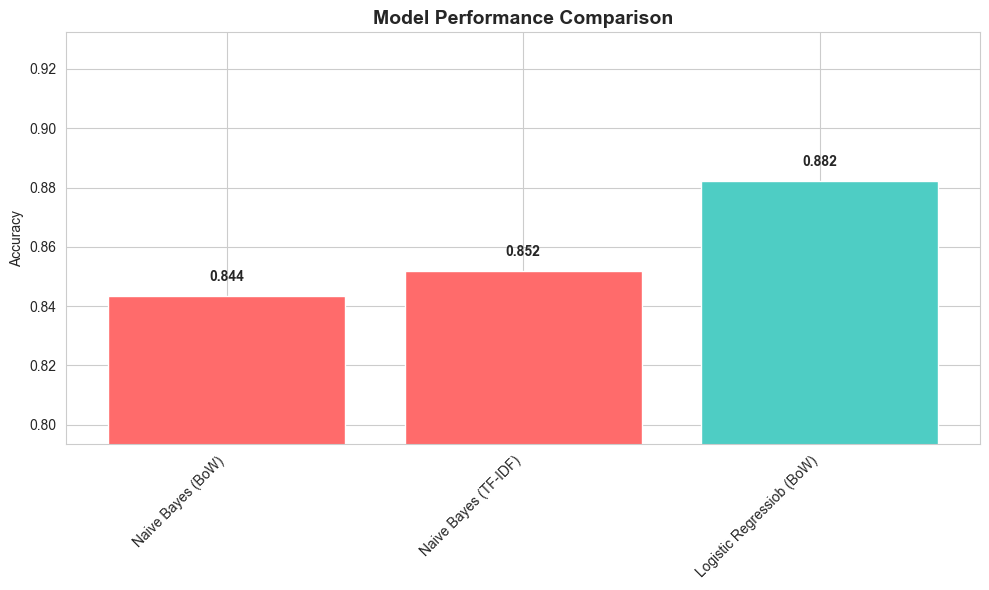

Model comparison visualization created


In [57]:
# 5. Model Comparison
plt.figure(figsize=(10, 6))
models = list(results.keys())
accuracies = list(results.values())
colors = ['#ff6b6b' if acc < max(accuracies) else '#4ecdc4' for acc in accuracies]

plt.bar(range(len(models)), accuracies, color=colors)
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([min(accuracies)-0.05, max(accuracies)+0.05])

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model comparison visualization created")

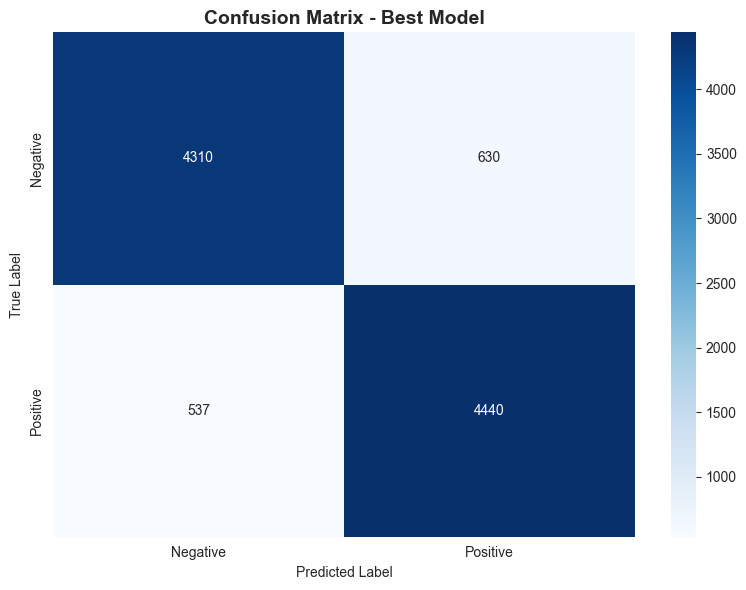

Confusion matrix visualization created


In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Best Model', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix visualization created")

In [59]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Chhav\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [60]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
import re 

def normalize_elongated_words(text):
    return re.sub(r'(.)\1{2,}',r'\1\1',text)
def preprocess_text(text):
    text = text.lower()
    text = normalize_elongated_words(text)
    text = re.sub(r'<.*?>','',text)
    text = re.sub(r'[^a-z\s]','',text)
    return text

In [62]:
df['clean_text']= df['review'].apply(preprocess_text)


In [63]:
df.columns

Index(['review', 'sentiment', 'cleaned_review', 'review_length', 'word_count',
       'sentiment_numeric', 'clean_text'],
      dtype='object')

In [64]:
preprocess_text("I loveddddd the movie!!")

'i lovedd the movie'

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment_numeric']

In [66]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [67]:
import pickle

pickle.dump(model,open("sentiment_model.pkl","wb"))
pickle.dump(vectorizer,open("tfidf_vectorizer.pkl","wb"))